### Q2 
### Load the dataset and perform splitting into training and test sets with 75:25 ratio.Use tsne plot to visualise the dataset.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
#from pandas.plotiing import scatter_matrix
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn import svm # support vector machine
from sklearn.ensemble import RandomForestClassifier #Random_forest
from sklearn.tree import DecisionTreeClassifier #Decision tree
from sklearn.naive_bayes import GaussianNB #Naive_bayes
from sklearn.neighbors import KNeighborsClassifier #K nearest neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("C:/Users/Drishya/Downloads/in-vehicle-coupon-recommendation.csv")

In [3]:
#Replacing the special character to nan and then drop the columns
df['car'] = df['car'].replace('NaN',np.nan)
df['CarryAway'] = df['CarryAway'].replace('?',np.nan)
#Dropping the NaN rows now 
df.dropna(how='any',inplace=True)

In [4]:
#Assigning the numeric values to the string type variables
number = LabelEncoder()
df['destination'] = number.fit_transform(df['destination'])
df['passanger'] = number.fit_transform(df['passanger'])
df['weather'] = number.fit_transform(df['weather'])
df['time'] = number.fit_transform(df['time'])
df['coupon'] = number.fit_transform(df['coupon'])
df['expiration'] = number.fit_transform(df['expiration'])
df['gender'] = number.fit_transform(df['gender'])
df['maritalStatus'] = number.fit_transform(df['maritalStatus'])
df['education'] = number.fit_transform(df['education'])
df['occupation'] = number.fit_transform(df['occupation'])
df['Bar'] = number.fit_transform(df['Bar'])
df['CoffeeHouse'] = number.fit_transform(df['CoffeeHouse'])
df['car'] = number.fit_transform(df['car'])
df['CarryAway'] = number.fit_transform(df['CarryAway'])
df['income'] = number.fit_transform(df['income'])
df['Restaurant20To50'] = number.fit_transform(df['Restaurant20To50'])
df['RestaurantLessThan20'] = number.fit_transform(df['RestaurantLessThan20'])

In [5]:
# summarize the class distribution
target = df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=62, Percentage=57.407%
Class=0, Count=46, Percentage=42.593%


In [6]:
#Train_Test splitting
X = df.drop(['Y'],axis=1)
Y = df['Y']
X.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
1237,1,0,2,55,2,4,0,1,26,1,...,1,1,1,0,2,1,0,0,0,1
1238,1,1,2,80,0,2,1,1,26,1,...,1,1,1,0,2,1,0,0,0,1
1239,1,1,2,80,0,0,0,1,26,1,...,1,1,1,0,2,1,0,0,0,1
1240,1,1,2,80,0,1,1,1,26,1,...,1,1,1,0,2,1,1,0,0,1
1241,1,1,2,80,2,2,0,1,26,1,...,1,1,1,0,2,1,0,0,0,1


In [7]:
print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25,random_state=0)

In [10]:
X

array([[-0.1142391 , -0.87028527,  0.44450044, ..., -0.38592249,
        -0.38592249,  0.38592249],
       [-0.1142391 ,  0.59832112,  0.44450044, ..., -0.38592249,
        -0.38592249,  0.38592249],
       [-0.1142391 ,  0.59832112,  0.44450044, ..., -0.38592249,
        -0.38592249,  0.38592249],
       ...,
       [ 1.42798869, -0.87028527, -1.27000127, ...,  2.59119388,
        -0.38592249,  0.38592249],
       [ 1.42798869, -0.87028527, -1.27000127, ...,  2.59119388,
        -0.38592249,  0.38592249],
       [ 1.42798869, -0.87028527,  0.44450044, ..., -0.38592249,
         2.59119388, -2.59119388]])

In [11]:
Y

1237    1
1238    0
1239    1
1240    0
1241    1
       ..
8293    1
8294    1
8295    1
8296    1
8297    1
Name: Y, Length: 108, dtype: int64

In [12]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((81, 25), (81,), (27, 25), (27,))

In [14]:
y_train = y_train.to_numpy()

In [15]:
y_test = y_test.to_numpy()

In [16]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [18]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
fashion_tsne = TSNE().fit_transform(X_train)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 0.47745513916015625 seconds


In [19]:
from bioinfokit.visuz import cluster
cluster.tsneplot(score=fashion_tsne)

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

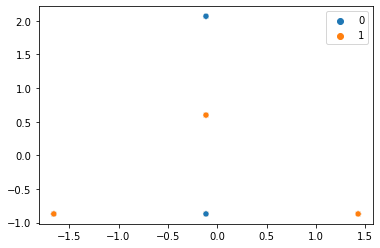

In [20]:
sns.scatterplot(X_train[:,0],X_train[:,1],hue = y_train)

### Implement the kNN algorithm from scratch . 

In [29]:
# Importing libraries
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from scipy.stats import mode

from sklearn.neighbors import KNeighborsClassifier

# K Nearest Neighbors Classification

class K_Nearest_Neighbors_Classifier() :
    def __init__( self, K ) :
        self.K = K
    # Function to store training set
    def fit( self, X_train, Y_train ) :
        self.X_train = X_train
        self.Y_train = Y_train
        # no_of_training_examples, no_of_features
        self.m, self.n = X_train.shape
    

    def predict( self, X_test ) :
        self.X_test = X_test
        # no_of_test_examples, no_of_features
        self.m_test, self.n = X_test.shape

        # initialize Y_predict

        Y_predict = np.zeros( self.m_test )
        for i in range( self.m_test ) :
            x = self.X_test[i]
            # find the K nearest neighbors from current test example
            neighbors = np.zeros( self.K )
            neighbors = self.find_neighbors( x )
            # most frequent class in K neighbors
            Y_predict[i] = mode( neighbors )[0][0]	
        return Y_predict
    # Function to find the K nearest neighbors to current test example
    def find_neighbors( self, x ) :
        euclidean_distances = np.zeros( self.m )
        for i in range( self.m ) :
            d = self.euclidean( x, self.X_train[i] )
            euclidean_distances[i] = d
        inds = euclidean_distances.argsort()
        Y_train_sorted = self.Y_train[inds]
        return Y_train_sorted[:self.K]

    # Function to calculate euclidean distance
    def euclidean( self, x, x_train ) :
        return np.sqrt( np.sum( np.square( x - x_train ) ) )

# Driver code

def main() :
    # Splitting dataset into train and test set

    model = K_Nearest_Neighbors_Classifier( K = 3 )
    
    model.fit( X_train, y_train )

    model1 = KNeighborsClassifier( n_neighbors = 3 )
    
    model1.fit( X_train, y_train )
    Y_pred = model.predict( X_test )
    Y_pred_train = model.predict(X_train)
    Y_pred1 = model1.predict( X_test )
    
    # measure performance
    
    correctly_classified = 0
    correctly_classified_train = 0
    correctly_classified1 = 0
    
    # counter
    
    count = 0
    
    for count in range( np.size( Y_pred ) ) :
        if y_test[count] == Y_pred[count] :
            correctly_classified = correctly_classified + 1
        if y_test[count] == Y_pred1[count] :
            correctly_classified1 = correctly_classified1 + 1            
        if y_train[count] == Y_pred_train[count] :
            correctly_classified_train = correctly_classified + 1
        count = count + 1
        
    print( "Accuracy on test set by our model: ", (correctly_classified / count ) * 100 )
    print( "Accuracy on train set by our model: ", (correctly_classified_train / count ) * 100 )
    print( "Accuracy on test set by sklearn model : ", (correctly_classified1 / count ) * 100 )
    
    
if __name__ == "__main__" :
    
    main()


Accuracy on test set by our model:  37.03703703703704
Accuracy on train set by our model:  40.74074074074074
Accuracy on test set by sklearn model :  37.03703703703704


Accuracy on test set by our model:  59.25925925925925
Accuracy on train set by our model:  62.96296296296296
Accuracy on test set by our model:  44.44444444444444
Accuracy on train set by our model:  48.148148148148145
Accuracy on test set by our model:  37.03703703703704
Accuracy on train set by our model:  40.74074074074074
Accuracy on test set by our model:  55.55555555555556
Accuracy on train set by our model:  59.25925925925925
Accuracy on test set by our model:  44.44444444444444
Accuracy on train set by our model:  48.148148148148145
Accuracy on test set by our model:  44.44444444444444
Accuracy on train set by our model:  48.148148148148145
Accuracy on test set by our model:  44.44444444444444
Accuracy on train set by our model:  48.148148148148145
Accuracy on test set by our model:  44.44444444444444
Accuracy on train set by our model:  48.148148148148145
Accuracy on test set by our model:  48.148148148148145
Accuracy on train set by our model:  51.85185185185185
Accuracy on t

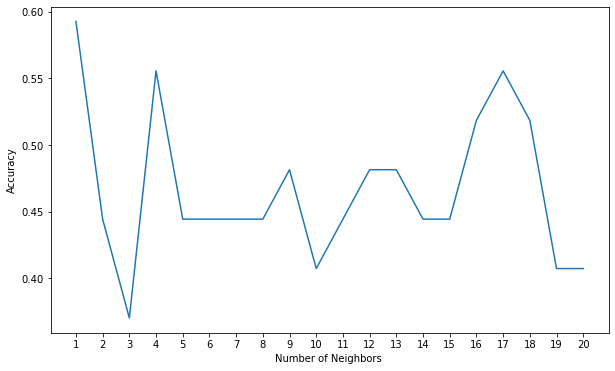

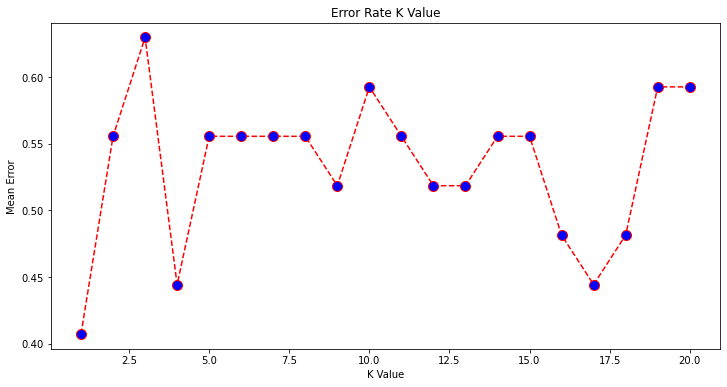

In [35]:
# Importing libraries
import pandas as pd
from sklearn import metrics
import numpy as np

from sklearn.model_selection import train_test_split

from scipy.stats import mode

from sklearn.neighbors import KNeighborsClassifier

# K Nearest Neighbors Classification

class K_Nearest_Neighbors_Classifier() :
    def __init__( self, K ) :
        self.K = K
    # Function to store training set
    def fit( self, X_train, Y_train ) :
        self.X_train = X_train
        self.Y_train = Y_train
        # no_of_training_examples, no_of_features
        self.m, self.n = X_train.shape

    def predict( self, X_test ) :
        self.X_test = X_test
        # no_of_test_examples, no_of_features
        self.m_test, self.n = X_test.shape

        # initialize Y_predict

        Y_predict = np.zeros( self.m_test )
        for i in range( self.m_test ) :
            x = self.X_test[i]
            # find the K nearest neighbors from current test example
            neighbors = np.zeros( self.K )
            neighbors = self.find_neighbors( x )
            # most frequent class in K neighbors
            Y_predict[i] = mode( neighbors )[0][0]	
        return Y_predict
    # Function to find the K nearest neighbors to current test example
    def find_neighbors( self, x ) :

        euclidean_distances = np.zeros( self.m )
        for i in range( self.m ) :
            d = self.euclidean( x, self.X_train[i] )
            euclidean_distances[i] = d
        inds = euclidean_distances.argsort()
        Y_train_sorted = self.Y_train[inds]
        return Y_train_sorted[:self.K]
    
    # Function to calculate euclidean distance
    def euclidean( self, x, x_train ) :
        return np.sqrt( np.sum( np.square( x - x_train ) ) )

# Driver code

def main() :
    # Splitting dataset into train and test set
    mean_acc = np.zeros(20)
    error = []
    for i in range(1,21):
        model = K_Nearest_Neighbors_Classifier( K = i )    
        model.fit( X_train, y_train )
        # Prediction on test set
        Y_pred = model.predict( X_test )
        Y_pred_train = model.predict(X_train)
        mean_acc[i-1] = metrics.accuracy_score(y_test, Y_pred)
        error.append(np.mean(Y_pred != y_test))
        # measure performance
        
        correctly_classified = 0
        correctly_classified_train = 0
        # counter

        count = 0
        for count in range( np.size( Y_pred ) ) :
            if y_test[count] == Y_pred[count] :
                correctly_classified = correctly_classified + 1
         
            if y_train[count] == Y_pred_train[count] :
                correctly_classified_train = correctly_classified + 1
            count = count + 1

        print( "Accuracy on test set by our model: ", (correctly_classified / count ) * 100 )
        print( "Accuracy on train set by our model: ", (correctly_classified_train / count ) * 100 )
        
    print(mean_acc)
    loc = np.arange(1,21,step=1.0)
    plt.figure(figsize = (10, 6))
    plt.plot(range(1,21), mean_acc)
    plt.xticks(loc)
    plt.xlabel('Number of Neighbors ')
    plt.ylabel('Accuracy')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')


    
    
    
if __name__ == "__main__" :
    
    main()


### Finding values of k with GridSearch

In [ ]:
### Finding K using Grid Search

0     0.603676
1     0.591912
2     0.703676
3     0.715441
4     0.691176
5     0.702941
6     0.690441
7     0.702941
8     0.652941
9     0.665441
10    0.616176
11    0.590441
12    0.554412
13    0.578676
14    0.529412
Name: mean_test_score, dtype: float64


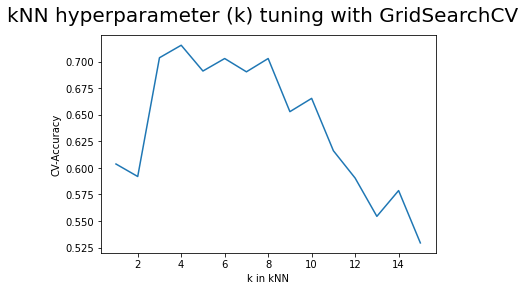

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from scipy.stats import mode
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# K Nearest Neighbors Classification

class K_Neighbors_Classifier() :
    def __init__( self, K ) :
        self.K = K    

    def fit( self, X_train, Y_train ):
        self.X_train = X_train
        self.Y_train = Y_train
        # no_of_training_examples, no_of_features
        self.m, self.n = X_train.shape
    # Function for prediction
    def predict( self, X_test ) :
        self.X_test = X_test
        # no_of_test_examples, no_of_features
        self.m_test, self.n = X_test.shape
        # initialize Y_predict
        Y_predict = np.zeros( self.m_test )
        for i in range( self.m_test ) :
            x = self.X_test[i]
            # find the K nearest neighbors from current test example
            neighbors = np.zeros( self.K )
            neighbors = self.find_neighbors( x )
            # most frequent class in K neighbors
            Y_predict[i] = mode( neighbors )[0][0]	
        return Y_predict

    def find_neighbors( self, x ) :
        euclidean_distances = np.zeros( self.m )
        for i in range( self.m ) :
            d = self.euclidean( x, self.X_train[i] )
            euclidean_distances[i] = d
        inds = euclidean_distances.argsort()
        Y_train_sorted = self.Y_train[inds]
        return Y_train_sorted[:self.K]


    def euclidean( self, x, x_train ) :
        return np.sqrt( np.sum( np.square( x - x_train ) ) )

# Driver code

def main() :
    metrics = ['euclidean']
    neighbors = np.arange(1, 16)
    param_grid  = dict(metric=metrics, n_neighbors=neighbors)
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', refit=True)
    grid_search.fit(X_train, y_train)
    
    yhat= grid_search.predict(X_test) 
    
    error = []
    error.append(np.mean(yhat != y_test))
    grid_search.cv_results_
    cross_val_df = pd.DataFrame(grid_search.cv_results_)
    cross_val_df.head()
        
    accuracies = cross_val_df[cross_val_df["param_metric"]=='euclidean']["mean_test_score"]
    print(accuracies)
    
    fig3 = plt.figure()
    plt.plot(neighbors, accuracies)
    plt.xlabel('k in kNN')
    plt.ylabel('CV-Accuracy')
    fig3.suptitle('kNN hyperparameter (k) tuning with GridSearchCV', fontsize=20)

    
if __name__ == "__main__" :
    main()


In [98]:
metrics = ['euclidean']
neighbors = [4]
param_grid  = dict(metric=metrics, n_neighbors=neighbors)
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', refit=True)
grid_search.fit(X_train, y_train)    
y_pred= grid_search.predict(X_test) 
y_pred_train = grid_search.predict(X_train)
test = accuracy_score(y_test,y_pred)
train = accuracy_score(y_train,y_pred_train)
print(train)
print(test)

0.8148148148148148
0.5555555555555556
